<a href="https://colab.research.google.com/github/deejayprof/NEXFORD/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/netflix_data.csv")

# Display missing values summary before cleaning
print("Missing values per column (before cleaning):")
print(data.isnull().sum())

# Address missing values
# Fill missing categorical values with "Unknown"
categorical_columns = ['type', 'director', 'cast', 'country', 'rating', 'listed_in']
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Drop rows where 'date_added' is missing
data = data.dropna(subset=['date_added'])

# Confirm no missing values remain
print("Missing values after cleaning:")
print(data.isnull().sum())

# Save the cleaned dataset
data.to_csv("cleaned_netflix_data.csv", index=False)

print("Rows with missing 'date_added' have been removed. Cleaned dataset saved as 'cleaned_netflix_data.csv'.")

Missing values per column (before cleaning):
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
Rows with missing 'date_added' have been removed. Cleaned dataset saved as 'cleaned_netflix_data.csv'.


In [8]:
#Data Exploration
# Load the cleaned dataset
data = pd.read_csv("cleaned_netflix_data.csv")

# Describe the data (numerical and categorical)
print("Summary Statistics for Numerical Columns:")
print(data.describe())  # Summary for numerical columns

print("\nSummary for Categorical Columns:")
print(data.describe(include=['object']))  # Summary for categorical columns

# Check unique genres
genres = data['listed_in'].str.split(', ').explode().value_counts()
print("\nUnique Genres and Their Counts:")
print(genres)

# Check the distribution of ratings
ratings = data['rating'].value_counts()
print("\nRatings Distribution:")
print(ratings)

# Perform statistical analysis
# Example: Year-wise content count
yearly_distribution = data['release_year'].value_counts().sort_index()
print("\nYear-wise Content Distribution:")
print(yearly_distribution)

Summary Statistics for Numerical Columns:
            show_id  release_year
count  6.223000e+03   6223.000000
mean   7.670879e+07   2013.362205
std    1.095015e+07      8.816695
min    2.477470e+05   1925.000000
25%    8.003654e+07   2013.000000
50%    8.016353e+07   2016.000000
75%    8.024498e+07   2018.000000
max    8.123573e+07   2020.000000

Summary for Categorical Columns:
         type        title director     cast        country       date_added  \
count    6223         6223     6223     6223           6223             6223   
unique      2         6162     3302     5460            555             1524   
top     Movie  The Silence  Unknown  Unknown  United States  January 1, 2020   
freq     4264            3     1958      569           2026              122   

       rating  duration      listed_in  \
count    6223      6223           6223   
unique     15       201            461   
top     TV-MA  1 Season  Documentaries   
freq     2025      1321            299   

      

<ipython-input-16-39e4d377ce5c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_data.index[:20], y=genres_data.values[:20], palette='viridis')


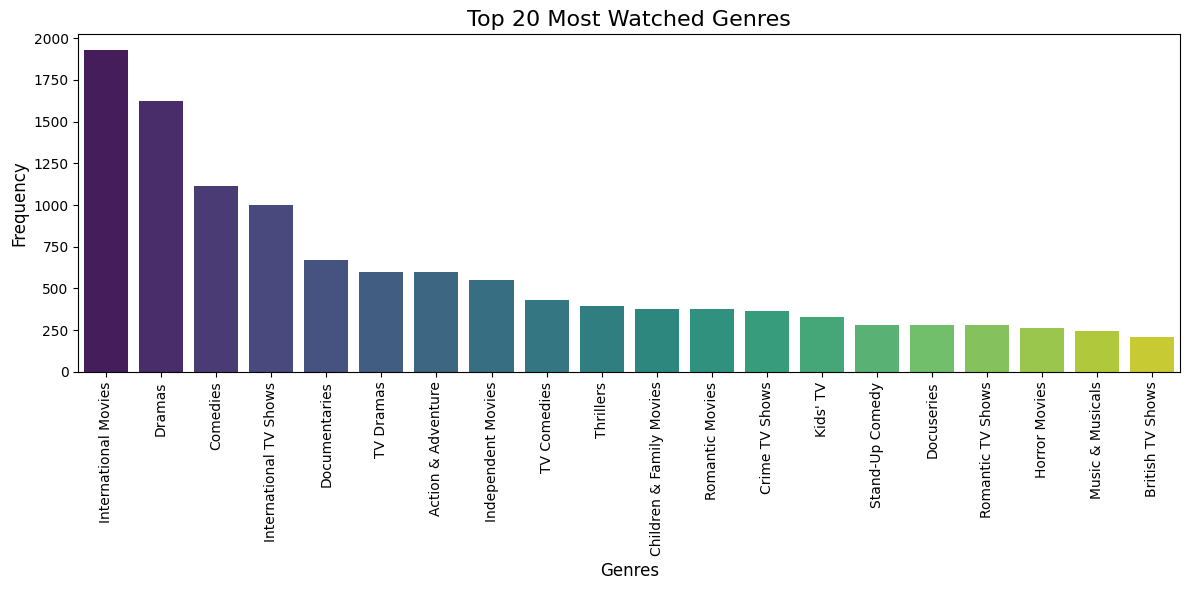

In [16]:
##DATA VISUALIZATION
#Most Watched Genres
import matplotlib.pyplot as plt
import seaborn as sns

# Split and count genres
genres_data = data['listed_in'].str.split(', ').explode().value_counts()

# Bar plot for most-watched genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_data.index[:20], y=genres_data.values[:20], palette='viridis')
plt.title("Top 20 Most Watched Genres", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-17-082f7cbe7455>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_data.index, y=ratings_data.values, palette='coolwarm')


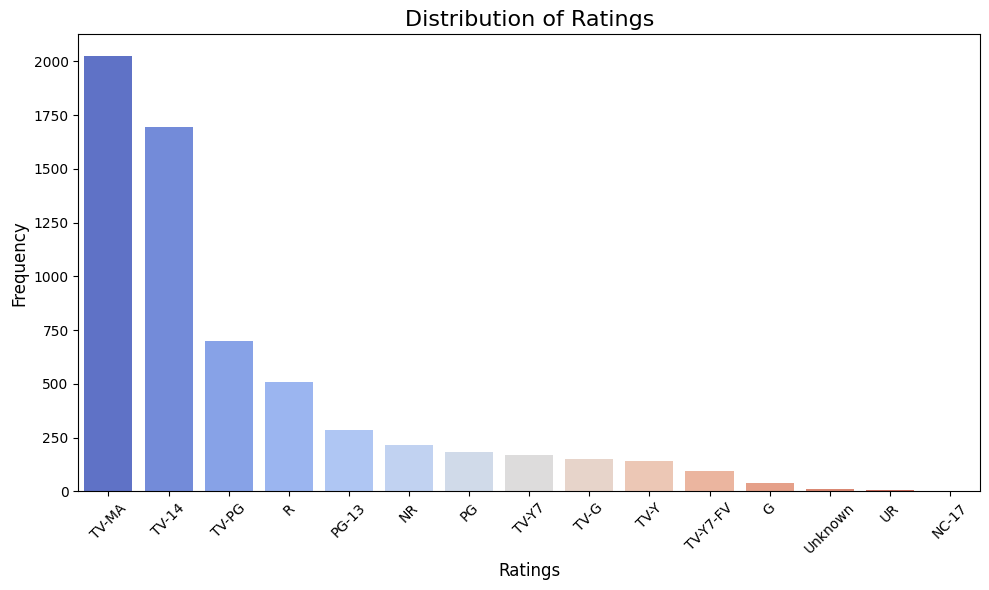

In [17]:
### Ratings distribution bar plot
ratings_data = data['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_data.index, y=ratings_data.values, palette='coolwarm')
plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()